<a href="https://colab.research.google.com/github/fourmodern/toc_tutorial_colab/blob/main/teachopencadd/t042_molt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MolT5**

## Introduction to MolT5

MolT5는 T5 (Text-To-Text Transfer Transformer) 아키텍처를 기반으로 한 분자 언어 모델로, 다양한 화학정보학(Cheminformatics) 작업을 처리하기 위해 설계되었습니다. 이 모델은 분자 설명을 SMILES(분자 구조를 표현하는 문자열 형식), IUPAC 이름, 분자 특성 등의 다양한 표현으로 변환할 수 있습니다. MolT5는 화학 언어와 구조화된 분자 데이터 간의 복잡한 매핑을 학습하는 능력 덕분에 신약 개발과 화학정보학 분야에서 중요한 도구로 활용될 수 있습니다.

MolT5에 대한 공식 논문은 "Self-Supervised Learning on Molecular Data as a Language Model"라는 제목으로 발표되었습니다. 이 논문은 자기 지도 학습(Self-Supervised Learning)이 분자 데이터에 어떻게 적용될 수 있는지 탐구하며, MolT5를 화학 구조를 이해하기 위한 통합 모델로 소개하고 있습니다. 이 연구는 대규모 데이터셋과 T5 아키텍처를 활용하여, MolT5가 분자 특성, 반응, 구조 등을 텍스트 기반 설명을 통해 효율적으로 처리할 수 있음을 보여줍니다.

## MolT5 튜토리얼

### 1. Colab 환경 설정

In [1]:
# 필요한 라이브러리 설치
!pip install -q transformers rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 20.3 MB/s eta 0:00:00


### 2. 라이브러리 가져오기

In [2]:
# 필요한 라이브러리 가져오기
from transformers import T5Tokenizer, T5ForConditionalGeneration
from rdkit.Chem import Draw
from rdkit import Chem
import pandas as pd  # 여러 분자 설명을 처리하기 위한 라이브러리
from IPython.display import display  # Colab에서 이미지를 표시하기 위한 라이브러리

### 3. MolT5 모델과 토크나이저 로드하기

In [3]:
# MolT5 모델과 토크나이저 로드
tokenizer = T5Tokenizer.from_pretrained("laituan245/molt5-large-caption2smiles", model_max_length=512)
model = T5ForConditionalGeneration.from_pretrained("laituan245/molt5-large-caption2smiles")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

### 4. 하나의 텍스트 설명을 분자로 변환하기

생성된 SMILES: COC1=CC=C(C=C1)CO


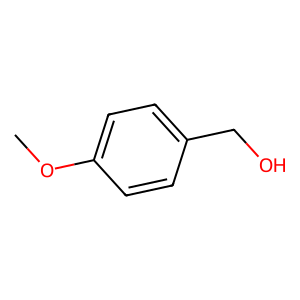

In [4]:
# 분자에 대한 텍스트 설명 입력
input_text = 'The molecule is a monomethoxybenzene that is 2-methoxyphenol substituted by a hydroxymethyl group at position 4.'

# 설명을 SMILES로 변환
inputs = tokenizer.encode(input_text, return_tensors="pt")
output_ids = model.generate(inputs, max_length=512)
smiles = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print("생성된 SMILES:", smiles)

# 분자 시각화
mol = Chem.MolFromSmiles(smiles)
if mol:
    display(Draw.MolToImage(mol, size=(300, 300)))
else:
    print("유효한 분자를 생성할 수 없습니다.")

### 5. 여러 개의 분자 설명을 일괄 처리

In [5]:
# 여러 개의 분자 설명 예시
descriptions = [
    'A benzene ring substituted with a nitro group at position 1 and a hydroxyl group at position 2.',
    'A molecule consisting of a six-membered ring with two hydroxyl groups at positions 1 and 3.',
    'An aliphatic compound containing a methyl group at the first carbon and an ethyl group at the second carbon.'
]

# 여러 설명을 처리하기 위한 DataFrame 생성
df = pd.DataFrame(descriptions, columns=['Description'])
df['SMILES'] = ''

# 각 설명에 대해 SMILES 생성
for idx, desc in enumerate(df['Description']):
    inputs = tokenizer.encode(desc, return_tensors="pt")
    output_ids = model.generate(inputs, max_length=512)
    df.at[idx, 'SMILES'] = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# DataFrame 표시
display(df)


,Description,SMILES
0,A benzene ring substituted with a nitro group ...,C1=CC=C(C(=C1)[N+](=O)[O-])O
1,A molecule consisting of a six-membered ring w...,C1=CC(=C(C=C1O)O)O
2,An aliphatic compound containing a methyl grou...,CCC(C)(C)C


### 6. 에러처리 및 시각화

생성된 SMILES: [H+].[H+].CC1=CC=C(C=C1)N


[05:12:25] WARNING: not removing hydrogen atom without neighbors
[05:12:25] WARNING: not removing hydrogen atom without neighbors


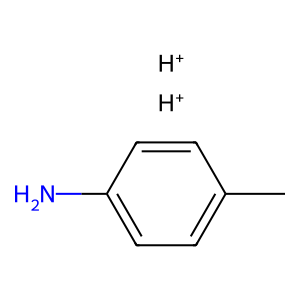

In [6]:
# 분자를 시각화하는 함수
def visualize_molecule(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            display(Draw.MolToImage(mol, size=(300, 300)))
        else:
            print(f"유효하지 않은 SMILES: {smiles}")
    except Exception as e:
        print(f"오류: {e}")

# 에러 처리가 포함된 예시
input_text = 'A molecule with an invalid description.'
inputs = tokenizer.encode(input_text, return_tensors="pt")
output_ids = model.generate(inputs, max_length=512)
smiles = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print("생성된 SMILES:", smiles)

# 에러 처리를 포함한 시각화
visualize_molecule(smiles)


### 7. SMILES를 설명으로 변환하기

In [7]:
# SMILES를 설명으로 변환하기 위한 모델 로드
tokenizer_caption = T5Tokenizer.from_pretrained("laituan245/molt5-large-smiles2caption", model_max_length=512)
model_caption = T5ForConditionalGeneration.from_pretrained("laituan245/molt5-large-smiles2caption")

# 예시 SMILES 문자열
smiles_example = "CCO"
inputs = tokenizer_caption.encode(smiles_example, return_tensors="pt")
output_ids = model_caption.generate(inputs, max_length=512)
description = tokenizer_caption.decode(output_ids[0], skip_special_tokens=True)

print("생성된 설명:", description)

tokenizer_config.json:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

생성된 설명: The molecule is an ether in which the oxygen atom is linked to two ethyl groups. It has a role as an inhalation anaesthetic, a non-polar solvent and a refrigerant. It is a volatile organic compound and an ether.


### 8. SMILES 문자열 변형

In [14]:
# MolT5를 SMILES-to-SMILES 변형 모델로 로드하기
tokenizer_smiles2caption = T5Tokenizer.from_pretrained("laituan245/molt5-large-smiles2caption", model_max_length=512)
model_smiles2caption = T5ForConditionalGeneration.from_pretrained("laituan245/molt5-large-smiles2caption")

# 원본 SMILES 예시
original_smiles = "CC(Cc1ccccc1)O"  # 페닐에틸알코올
# SMILES를 설명으로 변환
inputs = tokenizer_smiles2caption.encode(original_smiles, return_tensors="pt")
output_ids = model_smiles2caption.generate(inputs, max_length=512)
caption = tokenizer_smiles2caption.decode(output_ids[0], skip_special_tokens=True)

print("SMILES에 대한 설명:", caption)

SMILES에 대한 설명: The molecule is an alicyclic compound that is cyclopentene substituted at positions 1 and 3 by hydroxy and methyl groups respectively. It is an enol and an alicyclic compound.


결합된 설명: The molecule is an alicyclic compound that is cyclopentene substituted at positions 1 and 3 by hydroxy and methyl groups respectively. It is an enol and an alicyclic compound. In this molecule, the hydroxyl group is replaced by a carboxylic acid group.
변형된 SMILES: CC1CCC(=C1)O


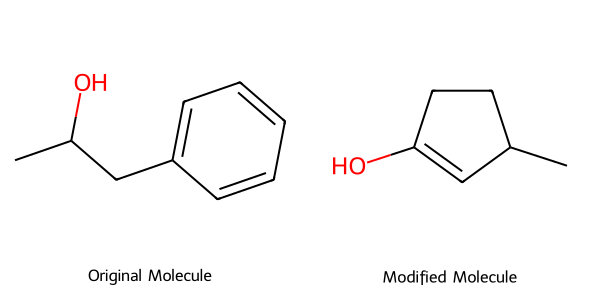

In [16]:
# 변형된 설명 (예: "hydroxyl group을 chlorine atom으로 대체"하여 에탄올을 염화에틸로 변형)
modification = "In this molecule, the hydroxyl group is replaced by a carboxylic acid group."
combined_caption = caption + " " + modification

print("결합된 설명:", combined_caption)

# Caption-to-SMILES 모델 로드
tokenizer_caption2smiles = T5Tokenizer.from_pretrained("laituan245/molt5-large-caption2smiles", model_max_length=512)
model_caption2smiles = T5ForConditionalGeneration.from_pretrained("laituan245/molt5-large-caption2smiles")

# 변형된 설명을 SMILES로 변환
inputs = tokenizer_caption2smiles.encode(combined_caption, return_tensors="pt")
output_ids = model_caption2smiles.generate(inputs, max_length=512)
modified_smiles = tokenizer_caption2smiles.decode(output_ids[0], skip_special_tokens=True)

print("변형된 SMILES:", modified_smiles)

# RDKit을 사용하여 분자 시각화
from rdkit.Chem import Draw
from rdkit import Chem

original_mol = Chem.MolFromSmiles(original_smiles)
modified_mol = Chem.MolFromSmiles(modified_smiles)

# 원본 및 변형된 분자를 그리드로 표시
if original_mol and modified_mol:
    img = Draw.MolsToGridImage([original_mol, modified_mol],
                               legends=["Original Molecule", "Modified Molecule"],
                               molsPerRow=2, subImgSize=(300, 300))
    display(img)
else:
    print("원본 또는 변형된 SMILES로부터 유효한 분자를 생성할 수 없습니다.")

## 결론 및 추가 탐색

MolT5는 텍스트와 분자 표현 간의 변환에서 뛰어난 다재다능함을 보여줍니다. 이 모델을 활용하면 화학 반응 예측, 분자 특성 추정 등의 다양한 화학정보학 작업에 적용할 수 있습니다.

### References

* MolT5 논문: Wang, W., He, X., & Zhu, S. (2022). "Self-Supervised Learning on Molecular Data as a Language Model". arXiv preprint arXiv:2204.11817.
* T5 아키텍처: Raffel, C., Shazeer, N., Roberts, A., 등. (2020). "Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer." Journal of Machine Learning Research, 21(140), 1-67.
* 관련 분자 NLP 모델: Schwaller, P., Laino, T., Gaudin, T., 등. (2019). "Molecular Transformer: A Model for Uncertainty-Calibrated Chemical Reaction Prediction." ACS Central Science, 5(9), 1572-1583.

